In [0]:
from fastai.vision import *


In [0]:
folder = 'Armbanduhr'
file = 'armband.csv'

In [0]:
folder = 'Pendeluhr'
file = 'pendel.csv'

In [0]:
folder = 'Wanduhr'
file = 'wanduhr.csv'

In [0]:
folder = 'Sanduhr'
file = 'sanduhr.csv'

In [0]:
path = Path('drive/My Drive/Colab Notebooks/images')

In [0]:
path.ls()

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(dest/file, dest, max_pics=200)

In [0]:
classes = ['Armbanduhr','Pendeluhr','Sanduhr','Wanduhr']

In [0]:
for c in classes:
    print(len((path/c).ls()))
    verify_images(path/c, max_size=400)

189


166


194


191


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Armbanduhr', 'Pendeluhr', 'Sanduhr', 'Wanduhr']

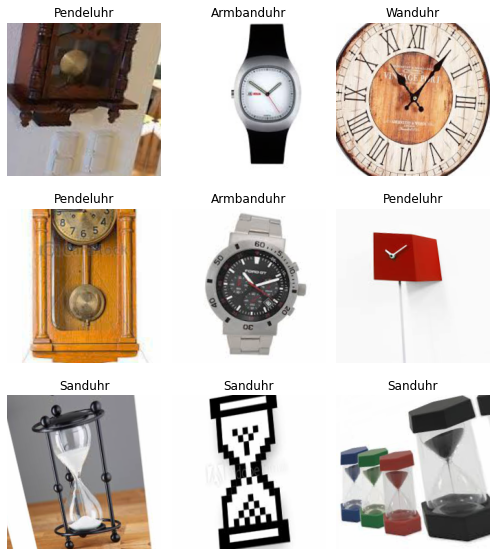

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Armbanduhr', 'Pendeluhr', 'Sanduhr', 'Wanduhr'], 4, 640, 160)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.430015,0.374048,0.108844,00:08
1,0.824473,0.218343,0.068027,00:08
2,0.575799,0.179383,0.047619,00:07
3,0.426402,0.182782,0.047619,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


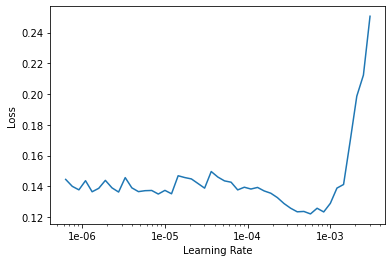

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, max_lr=slice(1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.150164,0.188790,0.047619,00:08
1,0.151246,0.177274,0.047619,00:07
2,0.143954,0.174522,0.047619,00:07
3,0.129769,0.186801,0.047619,00:07
4,0.119364,0.187821,0.047619,00:07
5,0.112209,0.193097,0.047619,00:07


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

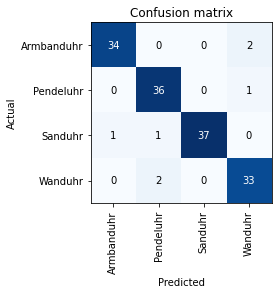

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()